Students: Nicolás Álvarez and Liam Glennie

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt

<h1>DISCLAIMER</h1>
<p>This problem is resolved for the .html export. For some reason that we don't understand, the str.format() function decided to not work properly. Therefore, all coded tables are no longer aligned properly. Some have been modifided so that they are more readable even though the code doesn't make sense. We apologise for this but we couldn't find the problem.</p>

In [44]:
data = pd.read_csv("project_sales.csv")
data.columns = ["id",
                "branch",
                "city",
                "customerType",
                "gender",
                "prodLine",
                "price",
                "quant",
                "tax",
                "tot",
                "date",
                "time",
                "payment",
                "cogs",
                "rating"]
atts = data.columns

data

,id,branch,city,customerType,gender,prodLine,price,quant,tax,tot,date,time,payment,cogs,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01/05/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03/08/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,NaN,03/03/2019,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,NaN,1/27/2019,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02 August 2019,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,NaN,1/29/2019,01:46:00 PM,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,NaN,03/02/2019,05:16:00 PM,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,02/09/2019,01:22:00 PM,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/2019,03:33:00 PM,Cash,65.82,4.1


As we can see, there are 1000 instances with 15 attributes per instance.

In [45]:
print("{0:^22}".format("DATA TYPES"))

print("-"*22)

for att in atts:
    print("{0:12}: {1}".format(str(att).strip(), str(data[att].dtype)))



print("\n{0:^20}".format("NULL VALUES"))

print("-"*20)

for att in atts:
    print("{0:<12}: {1:5}".format(att, (data[att].isnull() == True).sum()))


      DATA TYPES      
----------------------
id          : object
branch      : object
city        : object
customerType: object
gender      : object
prodLine    : object
price       : float64
quant       : float64
tax         : float64
tot         : float64
date        : object
time        : object
payment     : object
cogs        : float64
rating      : float64

    NULL VALUES     
--------------------
id          :     0
branch      :     0
city        :     0
customerType:     0
gender      :     0
prodLine    :     0
price       :    71
quant       :    74
tax         :     0
tot         :    69
date        :     0
time        :     0
payment     :     0
cogs        :    78
rating      :     0


There are many attributes with missing data. Unit price, Quantity, Total and Cogs. We also know that there are instances in Date and Time that are in different formats.

All the null values can be calculated using other attributes. However, we should probably remove the attributes that are directly proportionate to other attributes, like the tax and total attributes.

In [46]:
# nullAtts = ['Unit price', 'Quantity', 'Total', 'cogs']

data['price'].fillna(data['cogs']/data['quant'], inplace=True)
data['quant'].fillna(data['cogs']/data['price'], inplace=True)
data['tot'].fillna(data['cogs'] + data['tax'], inplace=True)
data['cogs'].fillna(data['tot'] - data['tax'], inplace=True)



In [47]:
print("{0:^20}".format("NULL VALUES"))

print("-"*20)

for att in atts:
    print("{0:12}: {1:5}".format(att, (data[att].isnull() == True).sum()))

    NULL VALUES     
--------------------
id          :     0
branch      :     0
city        :     0
customerType:     0
gender      :     0
prodLine    :     0
price       :     0
quant       :     0
tax         :     0
tot         :     0
date        :     0
time        :     0
payment     :     0
cogs        :     0
rating      :     0


The null values have been cleaned. Now we clean the date and time attributes so all instaces have the same format.

In [48]:
data['date'] = pd.to_datetime(data['date'])

In [49]:
data['time'] = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H:%M')

In [50]:
data

,id,branch,city,customerType,gender,prodLine,price,quant,tax,tot,date,time,payment,cogs,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-08-02,10:37,Ewallet,604.17,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.1


We will remove the attributes "tax" and "cogs" as they are directly related to the attribute "tot" in the following manner: tot = tax + cogs. It is highly likely that their univariate plots will be very similar and no additional information will be obtained from these redundant variables.

We are also going to investigate whether the attributes "branch" and "city" are related. That is, for every value of "branch" there is only one value for "city". If this is the case we will remove "city" because is easier to work with 3 letters than 3 names of cities.

In [51]:
print("Unique values for branch")
print(np.sort(data["branch"].unique()))

print("Unique values for city")
print(data["city"].unique())
print()

for b in np.sort(data["branch"].unique()):
    print("City where branch is " + b + ": " + data["city"][(data["branch"] == b)].unique())


Unique values for branch
['A' 'B' 'C']
Unique values for city
['Yangon' 'Naypyitaw' 'Mandalay']

['City where branch is A: Yangon']
['City where branch is B: Mandalay']
['City where branch is C: Naypyitaw']


Now that we know that the attributes "city", "tax" and "cogs" are redundant, we will remove them.

In [52]:
data = data.drop(["city", "tax", "cogs"], axis=1)
data

,id,branch,customerType,gender,prodLine,price,quant,tot,date,time,payment,rating
0,750-67-8428,A,Member,Female,Health and beauty,74.69,7.0,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5.0,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7.0,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Member,Male,Health and beauty,58.22,8.0,489.0480,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,86.31,7.0,634.3785,2019-08-02,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Normal,Male,Health and beauty,40.35,1.0,42.3675,2019-01-29,13:46,Ewallet,6.2
996,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10.0,1022.4900,2019-03-02,17:16,Ewallet,4.4
997,727-02-1313,A,Member,Male,Food and beverages,31.84,1.0,33.4320,2019-02-09,13:22,Cash,7.7
998,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1.0,69.1110,2019-02-22,15:33,Cash,4.1


In [53]:
data.to_csv('glennieCA1.csv')

In [54]:
def addCount(ax, isFloat=False):
    for p in ax.patches:
        if isFloat:
            ax.text(p.get_x() + p.get_width()/2.,
                    p.get_height(),
                    '{0:.2f}'.format(float(p.get_height())),
                    fontsize=12,
                    color='black',
                    ha='center',
                    va='bottom')
        else:
            ax.text(p.get_x() + p.get_width()/2.,
                    p.get_height(),
                    '{}'.format(int(p.get_height())),
                    fontsize=12,
                    color='black',
                    ha='center',
                    va='bottom')


<h3>Univariate plots</h3>

<h5>Numerical attributes</h5>

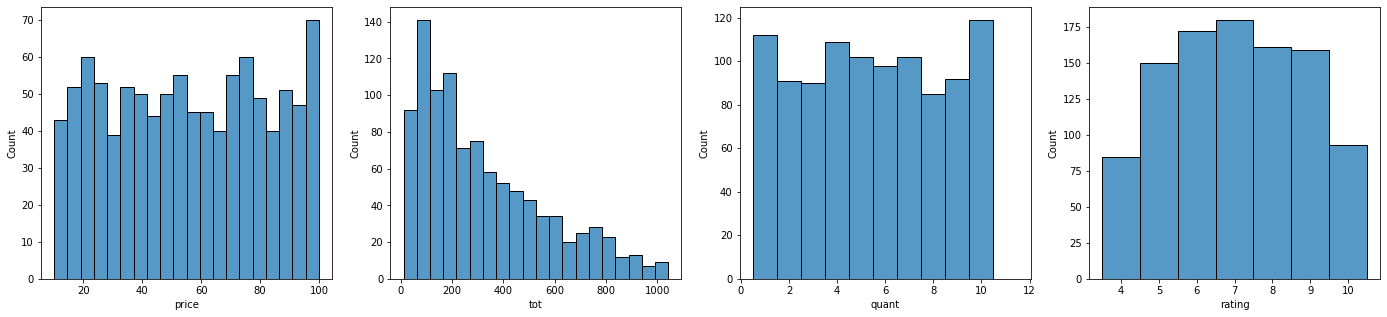

In [55]:
data = pd.read_csv('glennieCA1.csv')

plt.rcParams["figure.figsize"] = (24,5)
_, ax =plt.subplots(1,4)
sns.histplot(data, x="price", bins=20, ax=ax[0])
sns.histplot(data, x="tot", bins=20, ax=ax[1])
sns.histplot(data, x="quant", discrete=True, ax=ax[2])
sns.histplot(data, x="rating", discrete=True, ax=ax[3])
plt.show()

<h5>Categorical attributes</h5>

In [56]:
data.sort_values(by='branch', inplace=True)

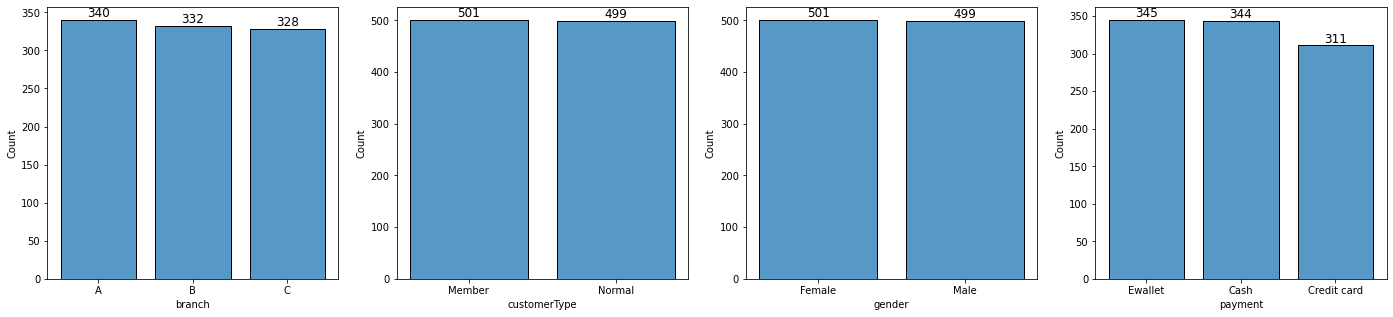

In [57]:
plt.rcParams["figure.figsize"] = (24,5)
_, ax =plt.subplots(1,4)
ax1 = sns.histplot(data, x="branch", shrink=0.8 ,ax=ax[0], hue_order=['A', 'B', 'C'])
addCount(ax1)
ax1 = sns.histplot(data, x="customerType", shrink=0.8 ,ax=ax[1])
addCount(ax1)
ax1 = sns.histplot(data, x="gender", shrink=0.8 ,ax=ax[2])
addCount(ax1)
ax1 = sns.histplot(data, x="payment", shrink=0.8 ,ax=ax[3])
addCount(ax1)
plt.show()

<h4>branch</h4>
<p>There's a fairly equal distribution of the instances among the 3 branches. If anything, there are more cases in branch A which could have an effect on the other attributes, for example, it could affect the average of the "tot" attribute for each branch.</p>

<h4>customerType</h4>
<p>The distribution is pretty much equal between member customers and normal ones.</p>

<h4>gender</h4>
<p>The gender of the customers is almost equally seperated between male and female customers.</p>

<h4>payment</h4>
<p>This histogram shows that payment by credit card is, in general, less prefered than cash or eWallet payments.</p>

In [58]:
print("Date min:", np.min(data['date']))
print("Date max:", np.max(data['date']))

print("Time min:", np.min(data['time']))
print("Time max:", np.max(data['time']))

Date min: 2019-01-01
Date max: 2019-12-03
Time min: 10:00
Time max: 20:59


Considering that the minimum date is 2019-01-01 and the maximum date is 2019-12-03, we can remove the year from the format. And to make to easier to visualise we will only keep the month, removing the date. This is only for visualisation purposes at the moment.

We will do the same for time, we will remove the minutes so we can represent the spread of the data properly.

In [59]:
date = pd.to_datetime(data['date'], errors='coerce', exact=False).dt.strftime('%m')

In [60]:
time = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H')

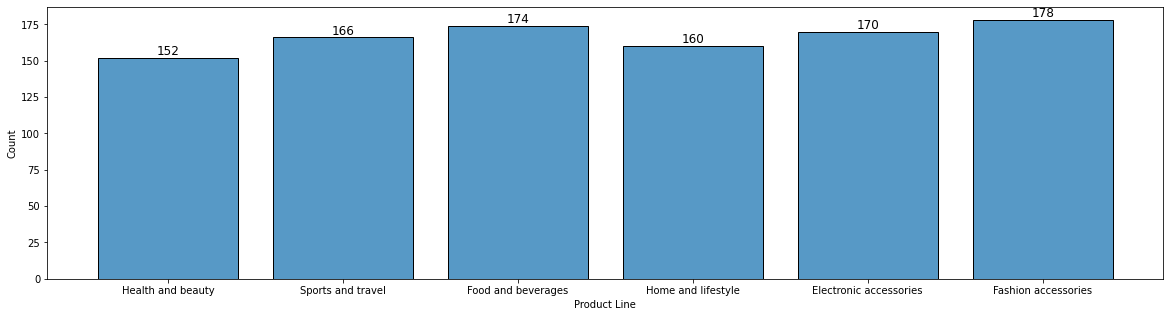

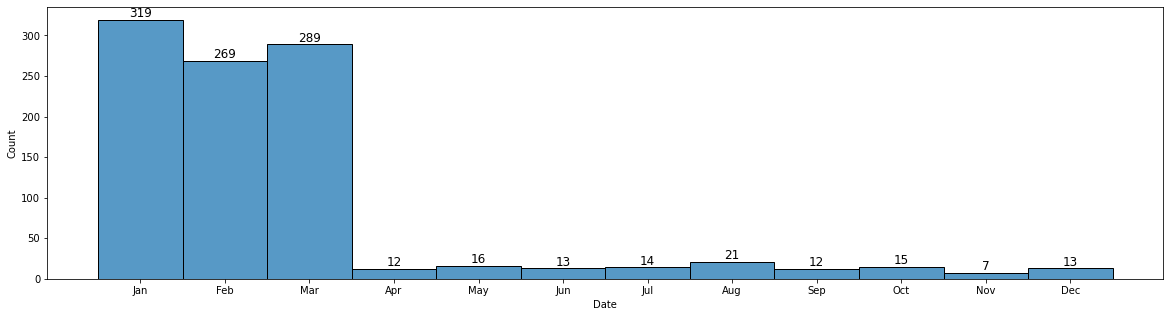

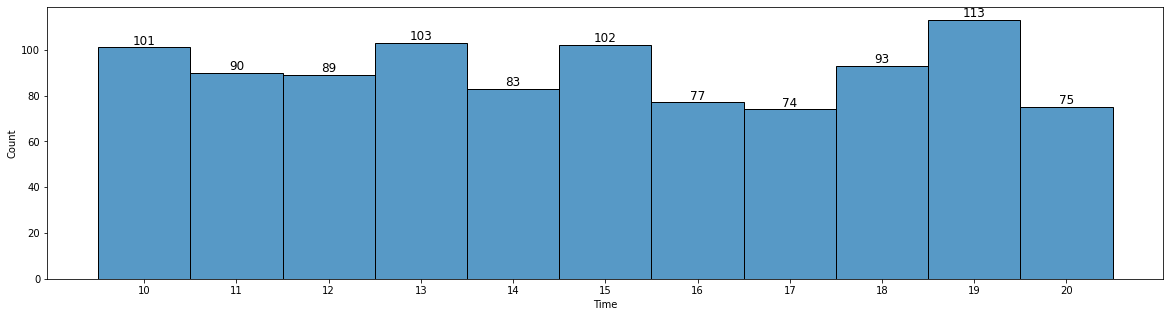

In [61]:
plt.rcParams["figure.figsize"] = (20,5)

ax = sns.histplot(data, x="prodLine", shrink=0.8)
addCount(ax)
plt.xlabel("Product Line")
plt.show()

ax = sns.histplot(np.sort(date),bins=12)
addCount(ax)
plt.xticks(np.arange(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                           "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Date")
plt.show()

labels = ["10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"]
ax = sns.histplot(np.sort(time), bins=10)
addCount(ax)
plt.xticks(labels)
plt.xlabel("Time")
plt.show()


<h4>prodLine</h4>
<p>We can see that there's not much difference between the number of purchases for each product line. We could argue that health & beauty and home & lifestyle products are purchased less frequently.</p>

<h4>month</h4>
<p>This attribute shows a clear drop in purchases per month after March. It's hard to determine what could have been the cause of this big decrease in purchases after March. This company seems to be based in Myanmar and we have researched events in March 2019 but there doesn't seem to be anything noticeable that would cause this drop in purchases. It could be because of a crisis or the political unrest.</p>

<h4>time</h4>
<p>There are a few noticeable spikes throughout the day when more purchases are made. The most predominant spike is at 19:00-19:59 which probably coincides with when people come out of work or school.</p>

<h5>Statistics of numerical attributes</h5>

In [62]:
numAtt = ["price", "quant", "tot", "rating"]


print("{0:^15} {1:^10} {2:^10} {3:^10} {4:^10}".format("ATTRIBUTE", "MEAN", "MEDIAN", "SKEWNESS", "KURTOSIS"))
print("-"*70)
for att in numAtt:
    print("{0:<15} {1:^10.2f} {2:^10.2f} {3:^10.2f} {4:^10.2f}".format(att, data[att].mean(), data[att].median(), data[att].skew(), data[att].kurtosis()))

   ATTRIBUTE       MEAN      MEDIAN    SKEWNESS   KURTOSIS 
----------------------------------------------------------------------
price             55.67      55.23       0.01      -1.22   
quant              5.51       5.00       0.01      -1.22   
tot               322.97     253.85      0.89      -0.08   
rating             6.97       7.00       0.01      -1.15   


<h4>price</h4>
<p>By looking at the difference between the mean and the median, we can observe that there is very little difference between the values for the possible range. This is confirmed by the skewness as it returns a very small value. From the kurtosis, we can obtain information about the spread of the data. In the case of the attribute "price", we can see that the value is less than -1, which means that the distribution of the data is very flat, that is, the data spread is high. <br> Both these conclusions are confirmed by observing the histogram. We can see very little skewness and the distribution ressembles a uniform distribution.</p>

<h4>quant</h4>
<p>From the statistics calculated for this attribute we draw the same conclusions as the "price" attribute. There is little to no skewness and the distribution is similar to a uniform distribution. Given that the kurtosis is less than -1, this data is platykurtic.</p>

<h4>tot</h4>
<p>The mean and median of this attribute differ by a large amount. And the skewness value is close to 1 which means that the data is strongly positively skewed. The kurtosis also suggests that this distribution is a normal distribution as the value is close to 0. We can confirm this by looking at the histogram for this attribute.</p>

<h4>rating</h4>
<p>The conclusions drawn from the statistics of this attribute are very similar to those drawn from "price" and "quant". The data is platykurtic and it is not skewed. Again, this can be observed by looking at the histogram.</p>

<h1>Descriptive Analysis</h1>

In [63]:
corr = data[numAtt].corr()
corr.style.background_gradient().set_precision(2)

,price,quant,tot,rating
price,1.00,0.01,0.63,-0.01
quant,0.01,1.00,0.71,-0.02
tot,0.63,0.71,1.00,-0.04
rating,-0.01,-0.02,-0.04,1.00


This shows us that there is a moderate correlation between the attribute "tot" and the attributes "quant" and "price". This is expected as "tot" is calculated from the product between "price" and "quant" (tot = 1.05 * price * quant). 

Another thing we can extract from this table is that there is no correlation between the attribute "rating" and the money spent per purchase. That is, there is no relationship between the attribute "rating" and the attributes "tot", "quant" or "price".

The rest of relationships will be analysed using bivariate and multivariate visualisations.

<h1>Bivariate analysis</h1>

<h3>Product Line and Gender bivariate analysis</h3>

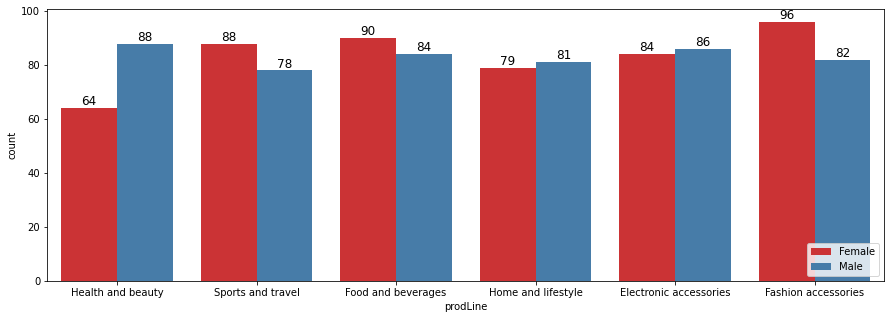

In [64]:
plt.rcParams["figure.figsize"] = (15,5)
ax = sns.countplot(x='prodLine', hue='gender', data=data, palette='Set1')
addCount(ax)
ax.legend(loc='lower right')
plt.show()

It's interesting to see that most of the purchases for health and beauty products were made by the male gender. Generally, especially for the beauty part of this type of product, the female gender tend to use more cosmetics. Therefore, it is possible that this company does not sell many cosmetic items and that they offer more pharmaceuticals and items that you would include in a first aid kit than cosmetics. However, it is also possible that men could be buying cosmetics for themselves or for someone else.

Fashion accessories have generally been used or worn more by females in the past. Having said that there are more males buying and wearing fashion accessories lately but is unlikely that this would be reflected in the dataset. Therefore, the difference in the number of male and female purchases for fashion accessories is to be expected.

It would be nice to have some more information on the sport and travel related purchases to see if there is a difference between the genders when it comes to purchasing sport or travel items. 

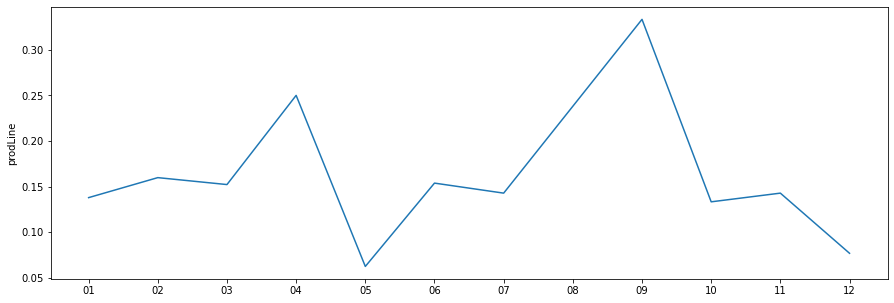

In [65]:
(data['prodLine'] == 'Health and beauty').sum()
sns.lineplot(x=np.sort(date), y=(data['prodLine'] == 'Health and beauty'), ci=None)
plt.show()

This plot was made to see if there were any particular moments throughout the year where more health and beauty items were purchased. Mainly, to see if there was in increase around December as it would be likely that these purchases would result in being gifts for example.

<h3>Average Rating and Branch bivariate analysis</h3>

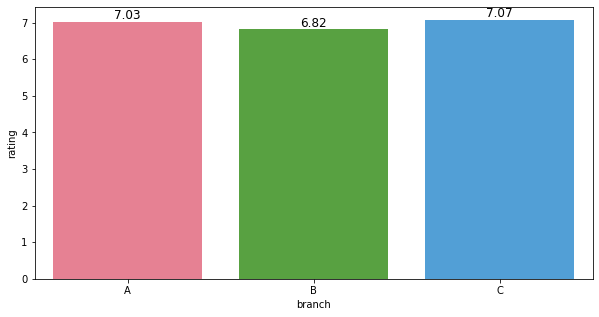

In [66]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x='branch', y='rating', data=data, order=['A', 'B', 'C'], palette='husl', ci=None)
addCount(ax, isFloat=True)
plt.show()

This plot was to discover if there was a particular branch that had a higher customer satisfaction. As we can see, there isn't much difference between the branches. If anything, branch B has a slightly lower rating.

If this plot were to show that there was between in rating between the branches, we could use that information and advise the company on it. Then, they could use that information to find out why one branch has a higher rating or why the other branch or branches have a lower rating.

<h3>Average Total spend and Branch bivariate analysis</h3>

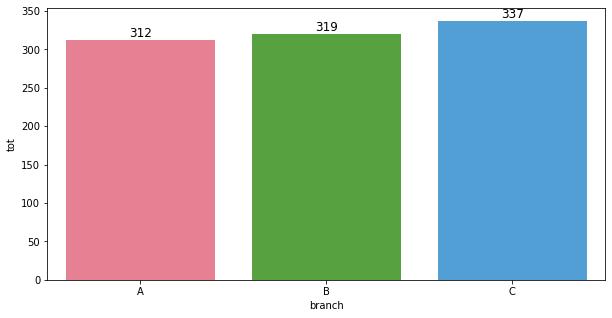

In [67]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x='branch', y='tot', data=data, order=['A', 'B', 'C'], palette='husl', ci=None)
addCount(ax)
plt.show()

From this plot, we can see that customers who shop in branch C tend to spend more money per purchase. This could be due to it being in a higher income area, the average price of the product sold in this branch could be higher or branch C has more variety and products on offer. Essentially, it could be a bigger branch.

<h3>Total spend and Customer Type bivariate analysis</h3>

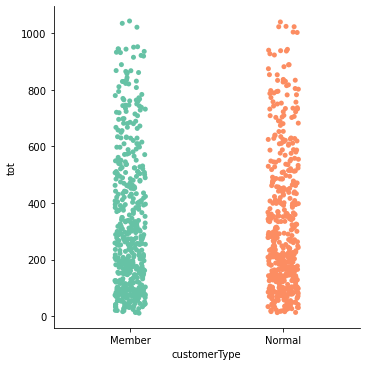

In [68]:
ax = sns.catplot(x='customerType', y='tot', data=data, palette='Set2', ci=None)
plt.show()

We can see that there is no real difference in quantity or distribution of the total value of purchases made by members and those made by non-members. Next, we will plot a barplot to see the difference in the means.

<h3>Average Total spend and Customer Type bivariate analysis</h3>

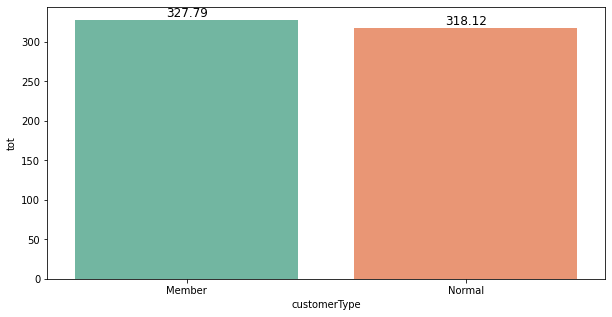

In [69]:
ax = sns.barplot(x='customerType', y='tot', data=data, palette='Set2', ci=None)
addCount(ax, isFloat=True)
plt.show()

There is a slight difference on average in the total spent per purchase by members compared to non-members. Perhaps, there is a reward system in place for members where the more you spend, the more points you get and these points could lead to prizes. Another option is that members could get a special discount of 5% for example. This could trick them into spending more.

<h3>Total spend and Payment bivariate analysis</h3>

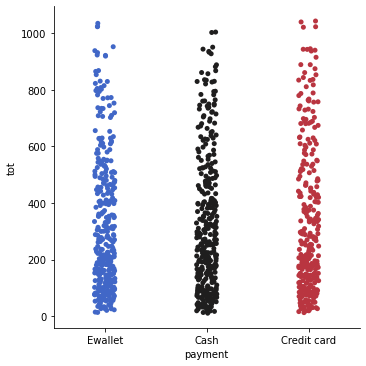

In [70]:
sns.catplot(x='payment', y='tot', data=data, palette='icefire')
plt.show()

<h3>Average Total spend and Payment bivariate analysis</h3>


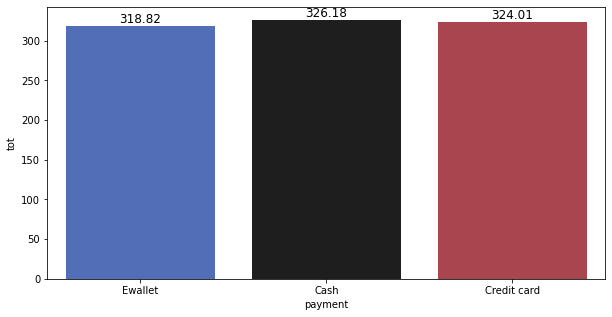

In [71]:
ax = sns.barplot(x='payment', y='tot', data=data, palette='icefire', ci=False)
addCount(ax, isFloat=True)
plt.show()

We can observe no noticeable difference in the total spent per purchase depending on the payment method. We could argue that purchases made by eWallet may have a lower total value because some eWallets may introduce a price cap on how much you can pay at a time.

An interesting point is that if we look at the histogram of the "payment" attribute, we can see that cash payment is very much still one of the prefered options. This is surprising considering cash payments are not as frequent nowadays after the pandemic. However, this dataset could be pre-COVID-19 or perhaps part of the company's customer demographic prefers to pay with cash.

<h3>Product Type spend and Branch bivariate analysis</h3>

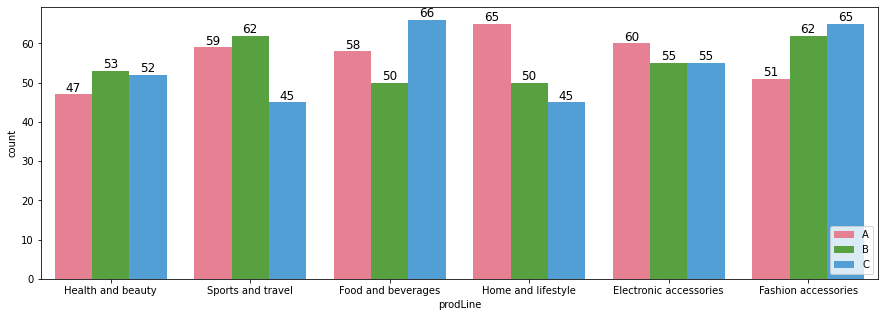

In [72]:
plt.rcParams["figure.figsize"] = (15,5)
ax = sns.countplot(x='prodLine', hue='branch', data=data, palette='husl', hue_order=['A', 'B', 'C'])
addCount(ax)
ax.legend(loc='lower right')
plt.show()

In [73]:
data['time'] = pd.to_datetime(data['time'], errors='coerce', exact=False).dt.strftime('%H')

<h3>Average Total spend and Time bivariate analysis</h3>

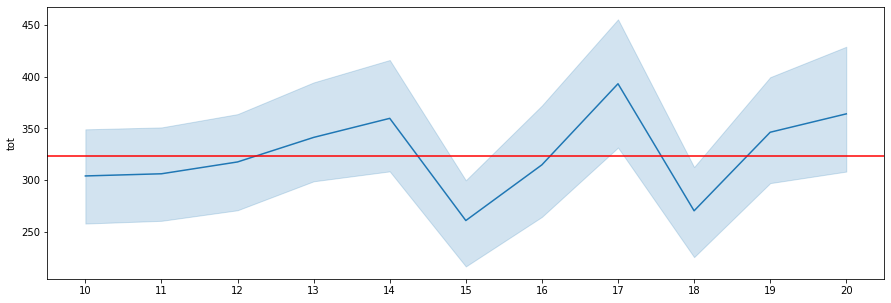

In [74]:
plt.rcParams["figure.figsize"] = (15,5)
g = sns.lineplot(x=np.sort(data['time']), y=data['tot'])
g.axhline(y=data['tot'].mean(), color='r', linestyle='-')
plt.show()

<h3>Gender and Customer Type bivariate analysis</h3>

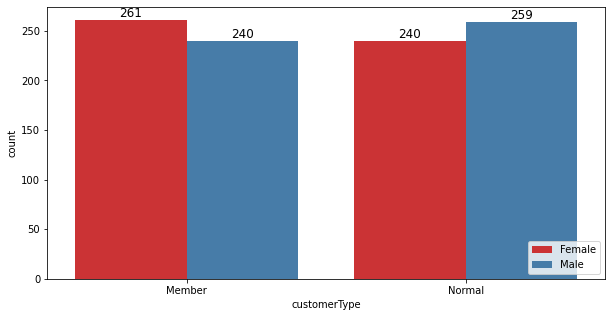

In [75]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.countplot(x='customerType', hue='gender', data=data, palette="Set1")
addCount(ax)
ax.legend(loc='lower right')
plt.show()


As we can see, there are more purchases of females that are member than non-members, what contrasts with the almost exact opposite case for male clients, being more of them non-members. It could be that marketing strategies aim at women as in general are them who invest more time in shopping. 

<h3>Branch and Customer Type bivariate analysis</h3>

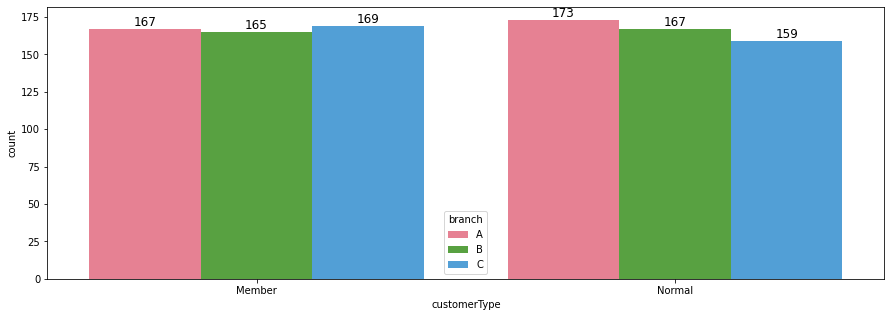

In [76]:
plt.rcParams["figure.figsize"] = (15,5)
ax = sns.countplot(x='customerType', hue='branch', data=data, palette='husl', hue_order=['A', 'B', 'C'])
addCount(ax)
plt.show()

There does not seem to be much difference on the number of purchases between members on the three branches, there seems to be in fact a pretty equal distribution. When it comes to talk about normal clients however, it is surprising to see that branch C has the lowest non-member purchases because, as we have seen previously, it was branch C the one with the highest average rating.

<h3>Rating and Gender bivariate analysis</h3>

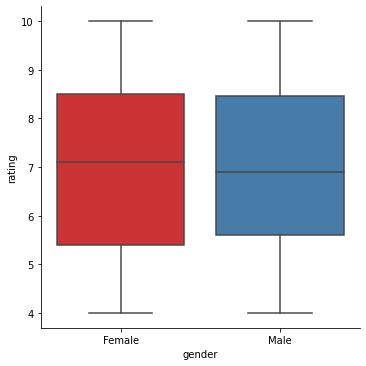

In [77]:
sns.catplot(x='gender', y='rating', data=data, kind='box',palette='Set1')
plt.show()

Ratings are observed to be considerably equal between male and female customers, being the female ones slighlty higher in average.

In [78]:
date = pd.to_datetime(data['date'], errors='coerce', exact=False).dt.strftime('%m')

<h1>Multivariate analysis</h1>

<h3>Average Total spend, Product Line and Month multivariate analysis</h3>

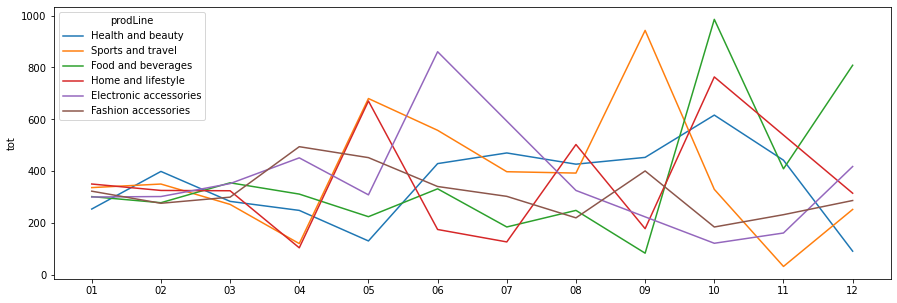

In [79]:
plt.rcParams["figure.figsize"] = (15,5)
sns.lineplot(x=np.sort(date), y=data['tot'], hue=data['prodLine'], ci=None)
plt.show()

As we can see, purchases in the different product lines remain fairly balanced during the months of January, February and March, while on the following months they become more dispersed. This, nonetheless, could be due to the unevenness of the data, having more instances of purchases from the first three months.
There is a considerable increase in sports and travel from April to May, probably beacuse of Easter and other festivities held during those dates. There is also a general increase from June, empahising once again sports and travel, as well as food and beverages, two of the main components of the summer. It is also during Christmas days when there is an increase in electronic accessories, home and lifestyle and fashion accessories, likely given as presents.

<h3>Average Rating, Branch and Gender multivariate analysis</h3>

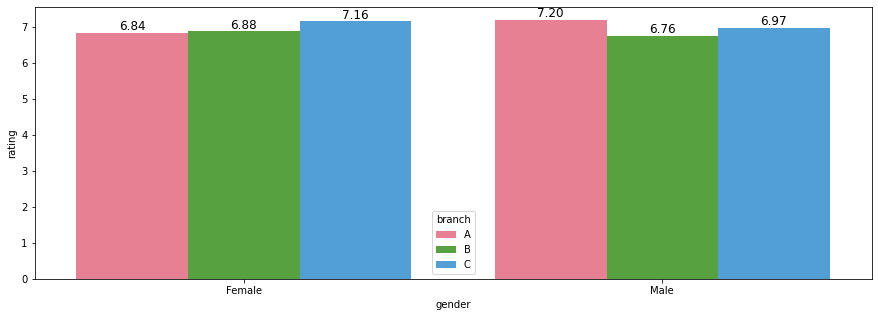

In [80]:
plt.rcParams["figure.figsize"] = (15,5)
plot = sns.barplot(x='gender', y='rating', hue='branch', data=data, hue_order=['A', 'B', 'C'], palette='husl', ci=None)
addCount(plot, isFloat=True)
plt.show()

As expected, branches A and C have a slighlty better opinion than branch B from both male and female customers. It is worth noting how men prefer branch A, while women opt for branch C. These branches might be aiming at different customers, offering better products or discounts to men on branch A, while happening the same for women on branch C.

<h3>Branch, Gender and Payment multivariate analysis</h3>

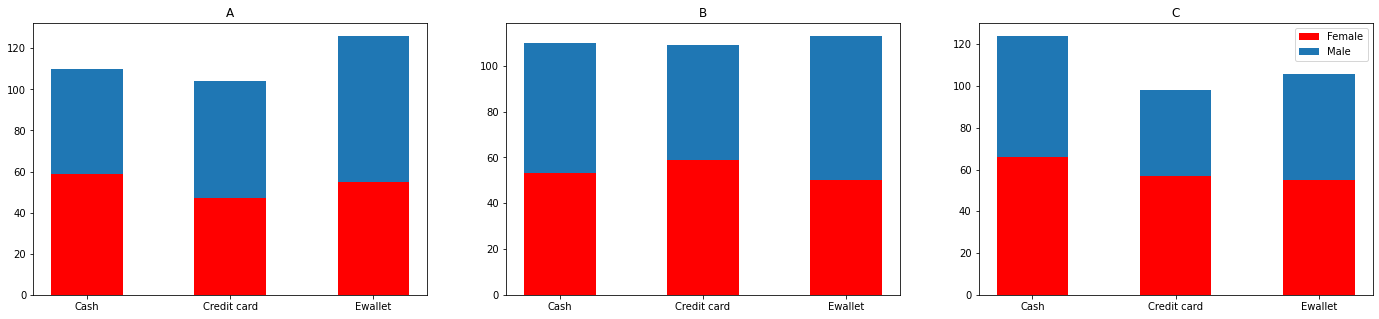

In [81]:
labels = ['Cash', 'Credit card', 'Ewallet']
gender = data['gender'].value_counts()
width = 0.5

female_values_A = [((data['branch'] == 'A') & (data['gender'] == 'Female') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'A') & (data['gender'] == 'Female') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'A') & (data['gender'] == 'Female') & (data['payment'] == 'Ewallet')).sum()]
male_values_A = [((data['branch'] == 'A') & (data['gender'] == 'Male') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'A') & (data['gender'] == 'Male') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'A') & (data['gender'] == 'Male') & (data['payment'] == 'Ewallet')).sum()]

female_values_B = [((data['branch'] == 'B') & (data['gender'] == 'Female') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'B') & (data['gender'] == 'Female') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'B') & (data['gender'] == 'Female') & (data['payment'] == 'Ewallet')).sum()]
male_values_B = [((data['branch'] == 'B') & (data['gender'] == 'Male') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'B') & (data['gender'] == 'Male') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'B') & (data['gender'] == 'Male') & (data['payment'] == 'Ewallet')).sum()]

female_values_C = [((data['branch'] == 'C') & (data['gender'] == 'Female') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'C') & (data['gender'] == 'Female') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'C') & (data['gender'] == 'Female') & (data['payment'] == 'Ewallet')).sum()]
male_values_C = [((data['branch'] == 'C') & (data['gender'] == 'Male') & (data['payment'] == 'Cash')).sum(), ((data['branch'] == 'C') & (data['gender'] == 'Male') & (data['payment'] == 'Credit card')).sum(), ((data['branch'] == 'C') & (data['gender'] == 'Male') & (data['payment'] == 'Ewallet')).sum()]



plt.rcParams["figure.figsize"] = (24,5)
_, ax =plt.subplots(1,3)

ax[0].bar(labels, female_values_A, width, label='Female', color='red')
ax[0].bar(labels, male_values_A, width, bottom=female_values_A, label='Male')
ax[0].set_title('A')

ax[1].bar(labels, female_values_B, width, label='Female', color='red')
ax[1].bar(labels, male_values_B, width, bottom=female_values_B, label='Male')
ax[1].set_title('B')

ax[2].bar(labels, female_values_C, width, label='Female', color='red')
ax[2].bar(labels, male_values_C, width, bottom=female_values_C, label='Male')
ax[2].set_title('C')
plt.legend()

plt.show()

In general, credit card is the least used payment method in the three branches, mainly caused by men as women in branches B and C use it more than the Ewallet payment method. Furthermore, it is just in branch C where cash is principally used by both genres, whereas on the other two branches is Ewallet the one that predominates. There does not seem to be any significant different between the payment methods that both genres use separately in the three branches whatsoever. This could mean that no privilege or advantage is given to any particular payment method, i.e., there is no particular reason to use a specific method.

<h3>Average Total spend, Gender and Customer Type multivariate analysis</h3>

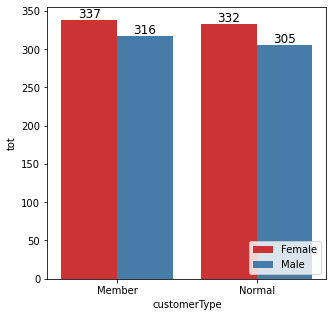

In [82]:
plt.rcParams["figure.figsize"] = (5,5)
ax = sns.barplot(x='customerType', y='tot', hue='gender', data=data, palette='Set1', ci=None)
addCount(ax)
ax.legend(loc='lower right')
plt.show()

<h3>Average Total spend, Gender and Branch multivariate analysis</h3>

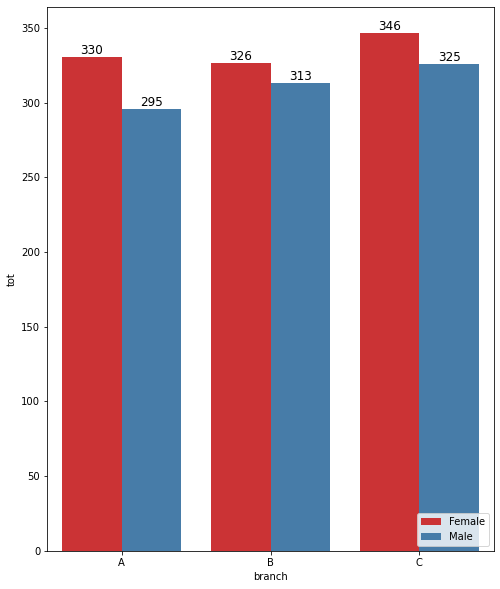

In [83]:
plt.rcParams["figure.figsize"] = (8,10)
ax = sns.barplot(x='branch', y='tot', hue='gender', data=data, order=['A', 'B', 'C'], palette='Set1', ci=None)
addCount(ax)
ax.legend(loc='lower right')
plt.show()

From the previous 2 plots we can gather that the average total spend per purchase is higher when the customer is a female compared to when the customer is male. The most notable difference is in branch A where we can see that females spend on average 35 Myanmar Kyat. It is possible that this branch has more female customers than male. However, as we can see below, this is not the case.

In [84]:
print("Purchases made by females:", ((data['branch'] == 'A') & (data['gender'] == 'Female')).sum())
print("Purchases made by males:", ((data['branch'] == 'A') & (data['gender'] == 'Male')).sum())

Purchases made by females: 161
Purchases made by males: 179


<h1>Hypothesis Testing</h1>

<h3> One sample hypothesis test</h3>
<p>We know that the mean of the attribute "rating" is 6.97. We will take a random sample of 50 instances and calculate its mean. We will assess if the difference between the means is statistically significant using a 1-sample t-test and a significance value of 5%.</p>
<p>H0: The sample mean is equal to the population mean (6.97).</p>
<p>H1: The sample mean is equal to the population mean (6.97).</p>

In [85]:
sample = []
sample = np.append(sample, np.random.choice(data['rating'], size=50))
_, p = stats.ttest_1samp(sample, np.mean(data['rating']))

print(p)

if p < 0.05:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")


0.38038055970159945
We fail to reject the null hypothesis


As the p-value is greater than 0.05, we fail to reject the hypothesis meaning that the sample selected is representative of the population data.

<h3>Two sample hypothesis test (numerical)</h2>

The rating of a purchase could be determined by its total cost. A possible idea is that a customer who spends a higher amount of money in a store is either because they like its products or its customer service.

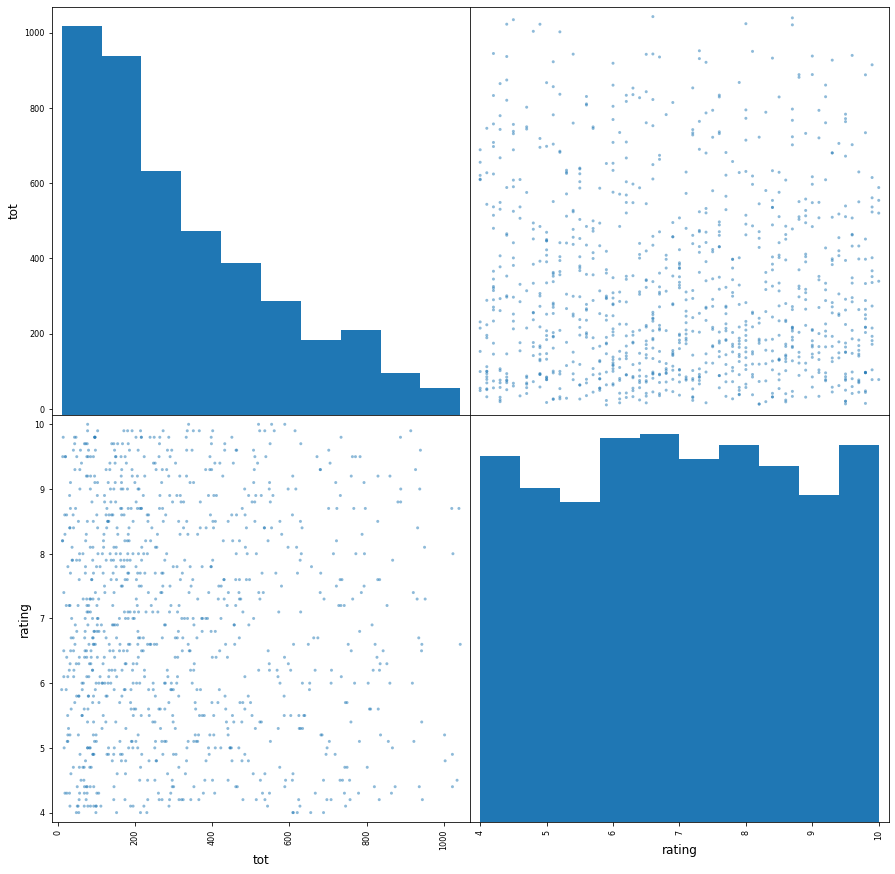

In [86]:
# Scatter Plot
plt.rc('font', size =12)
pd.plotting.scatter_matrix(data[['tot', 'rating']], figsize=(15,15))
plt.show()

We can observe in this scatter plot some rather disperse data, there is not an obvious linear dependency shown in it. For a more precise conclusion, let us find out the dependence of these two attributes by using the Pearson's Correlation Coefficient.

In [87]:
# Correlation Matrix
print("Correlation Table")
corr = data[['tot', 'rating']].corr()
corr.style.background_gradient().set_precision(3)

Correlation Table


,tot,rating
tot,1.000,-0.036
rating,-0.036,1.000


With a value of -0.036, we can confirm that there is no linear relationship between the total money spent on a purchase and the rating the customer gave it. 

<h3>Two sample hypothesis test (categorical)</h2>

As we mentioned earlier, it seemed like more purchases for health and beauty products were made by the male gender compared to the female gender. In this section we will study that hypothesis, therefore:

<p>H0: There is no significant difference between men and women buying beauty & health products.</p>
<p>H1: There is a significant difference between men and women buying beauty & health products.</p>

In [88]:
import math

male_true = len(data.query("gender == 'Male' & prodLine == 'Health and beauty'"))
female_true = len(data.query("gender == 'Female' & prodLine == 'Health and beauty'"))
male_false = len(data.query("gender == 'Male' & prodLine != 'Health and beauty'"))
female_false = len(data.query("gender == 'Female' & prodLine != 'Health and beauty'"))

p1 = male_true / (male_true + male_false)
p2 = female_true / (female_true + female_false)

p = (male_true + female_true) / (male_true + male_false + female_true + female_false)
z = (p1-p2) / (math.sqrt(p*(1-p)*((1/(male_true + male_false) + (1/(female_true + female_false))))))

print(z)

2.1407152604161515


In [89]:
from IPython.display import Image
Image(url= "./z-image.png", width=400, height=400)

In [90]:
p_value = (1-0.9838)*2
print(p_value)

0.032399999999999984


With a z-value of 2.14, we obtain a p-value of 0.032 which is lower that 0.05, so there is strong evidence to reject the null hypothesis and conclude that there is in fact a significant difference between the number of men and women that buy in the health and beauty product line.